# Importing libraries

In [1]:
# Necessary Libraries
import numpy as np # (for numeric operations)
import pandas as pd # (for data manipulation)
import matplotlib.pyplot as plt # (for plotting)
import seaborn as sns # (for advanced plotting)
import sklearn as skl # (machine learning library)
from datetime import date # (for date operations)

# Week 0

## Loading the data and early inspection

In [2]:
df_players = pd.read_csv('/Users/kishohars/Projects/football_valuation_project/data_raw/dataset/players.csv')

for i in df_players.columns:
    print(i)

player_id
first_name
last_name
name
last_season
current_club_id
player_code
country_of_birth
city_of_birth
country_of_citizenship
date_of_birth
sub_position
position
foot
height_in_cm
contract_expiration_date
agent_name
image_url
url
current_club_domestic_competition_id
current_club_name
market_value_in_eur
highest_market_value_in_eur


There are 23 columns present in this table

In [3]:
# Data Cleaning
# Drop columns that are not useful for analysis
df_players = df_players.drop(columns = ['url', 'image_url', 'city_of_birth', 'country_of_birth', 'contract_expiration_date', 'first_name', 'last_name'])

df_players.head()

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav Klose,2015,398,miroslav-klose,Germany,1978-06-09 00:00:00,Centre-Forward,Attack,right,184.0,ASBW Sport Marketing,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,1980-08-06 00:00:00,Goalkeeper,Goalkeeper,left,190.0,Neubauer 13 GmbH,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,1981-01-30 00:00:00,Centre-Forward,Attack,NaN,NaN,CSKA-AS-23 Ltd.,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,Lúcio,2012,506,lucio,Brazil,1978-05-08 00:00:00,Centre-Back,Defender,NaN,NaN,NaN,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom Starke,2017,27,tom-starke,Germany,1981-03-18 00:00:00,Goalkeeper,Goalkeeper,right,194.0,IFM,L1,FC Bayern München,100000.0,3000000.0


In [4]:
# Convert date_of_birth to datetime and finding age of players
df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'])

def calculate_age(born):
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_players['age'] = df_players['date_of_birth'].apply(calculate_age)

df_players.head()

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,10,Miroslav Klose,2015,398,miroslav-klose,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,ASBW Sport Marketing,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,47.0
1,26,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,Neubauer 13 GmbH,L1,Borussia Dortmund,750000.0,8000000.0,45.0
2,65,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,CSKA-AS-23 Ltd.,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,44.0
3,77,Lúcio,2012,506,lucio,Brazil,1978-05-08,Centre-Back,Defender,NaN,NaN,NaN,IT1,Juventus Football Club,200000.0,24500000.0,47.0
4,80,Tom Starke,2017,27,tom-starke,Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,IFM,L1,FC Bayern München,100000.0,3000000.0,44.0


## Week 1

In [5]:
# 1) Basic inspection
# Load the data into pandas
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             32601 non-null  int64         
 1   name                                  32601 non-null  object        
 2   last_season                           32601 non-null  int64         
 3   current_club_id                       32601 non-null  int64         
 4   player_code                           32601 non-null  object        
 5   country_of_citizenship                32218 non-null  object        
 6   date_of_birth                         32554 non-null  datetime64[ns]
 7   sub_position                          32421 non-null  object        
 8   position                              32601 non-null  object        
 9   foot                                  30065 non-null  object        
 10

In [6]:
df_players.describe()

,player_id,last_season,current_club_id,date_of_birth,height_in_cm,market_value_in_eur,highest_market_value_in_eur,age
count,3.260100e+04,32601.000000,32601.000000,32554,30345.000000,3.107800e+04,3.107800e+04,32554.000000
mean,3.483126e+05,2019.357259,4815.495813,1995-01-22 16:40:47.920378496,182.291943,1.639685e+06,3.789347e+06,30.189501
min,1.000000e+01,2012.000000,3.000000,1968-07-31 00:00:00,17.000000,1.000000e+04,1.000000e+04,16.000000
25%,1.079730e+05,2016.000000,403.000000,1990-08-06 00:00:00,178.000000,1.000000e+05,2.750000e+05,25.000000
50%,2.839170e+05,2020.000000,1063.000000,1995-08-22 12:00:00,183.000000,2.500000e+05,8.000000e+05,30.000000
75%,5.302230e+05,2023.000000,3060.000000,2000-03-22 00:00:00,187.000000,7.000000e+05,3.000000e+06,35.000000
max,1.391239e+06,2024.000000,110302.000000,2009-09-08 00:00:00,210.000000,2.000000e+08,2.000000e+08,57.000000
std,2.845089e+05,3.961564,11583.707786,NaN,7.037030,6.407293e+06,9.887241e+06,6.644979


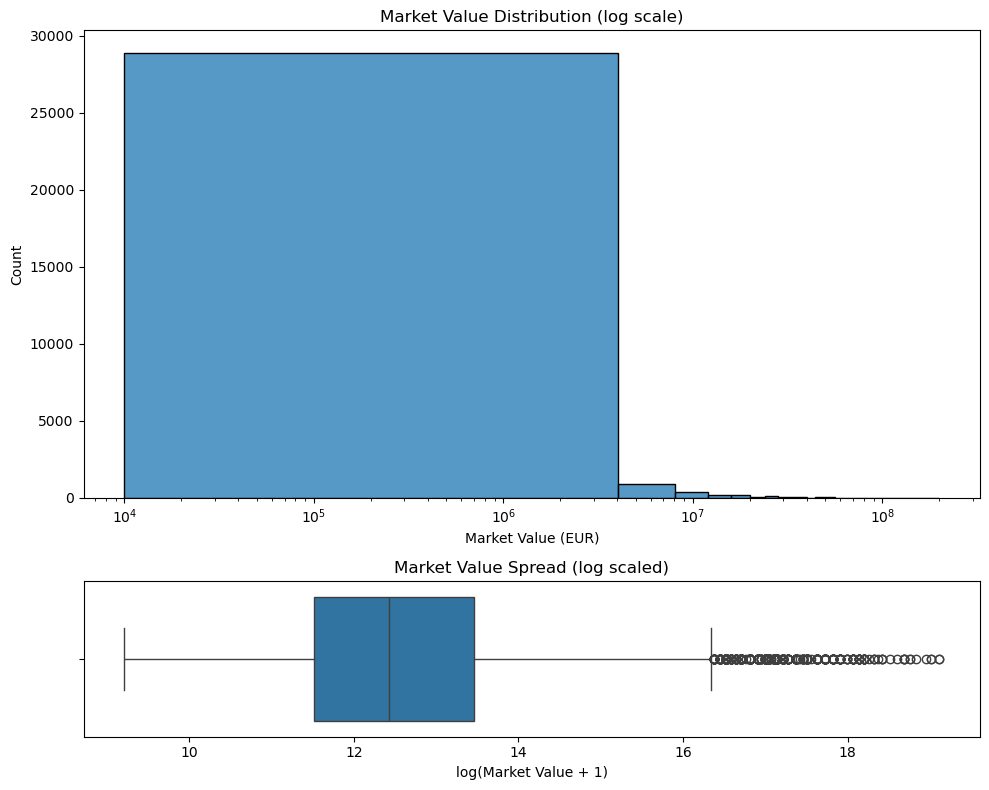

In [7]:
# Create figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# --- Histogram (with log scale) ---
sns.histplot(df_players['market_value_in_eur'], bins=50, ax=axes[0])
axes[0].set_xscale("log")
axes[0].set_title("Market Value Distribution (log scale)")
axes[0].set_xlabel("Market Value (EUR)")
axes[0].set_ylabel("Count")

# --- Boxplot (log transformed values) ---
sns.boxplot(x=np.log1p(df_players['market_value_in_eur']), ax=axes[1], orient="h")
axes[1].set_title("Market Value Spread (log scaled)")
axes[1].set_xlabel("log(Market Value + 1)")

plt.tight_layout()
plt.show()

In [8]:
# 2) Data Quality Checks
# a) Missing Values
df_players.isnull().sum()

player_id                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_citizenship                    383
date_of_birth                              47
sub_position                              180
position                                    0
foot                                     2536
height_in_cm                             2256
agent_name                              16019
current_club_domestic_competition_id        0
current_club_name                           0
market_value_in_eur                      1523
highest_market_value_in_eur              1523
age                                        47
dtype: int64

In [9]:
# b) Duplicate row check
df_players.duplicated().sum()

np.int64(0)

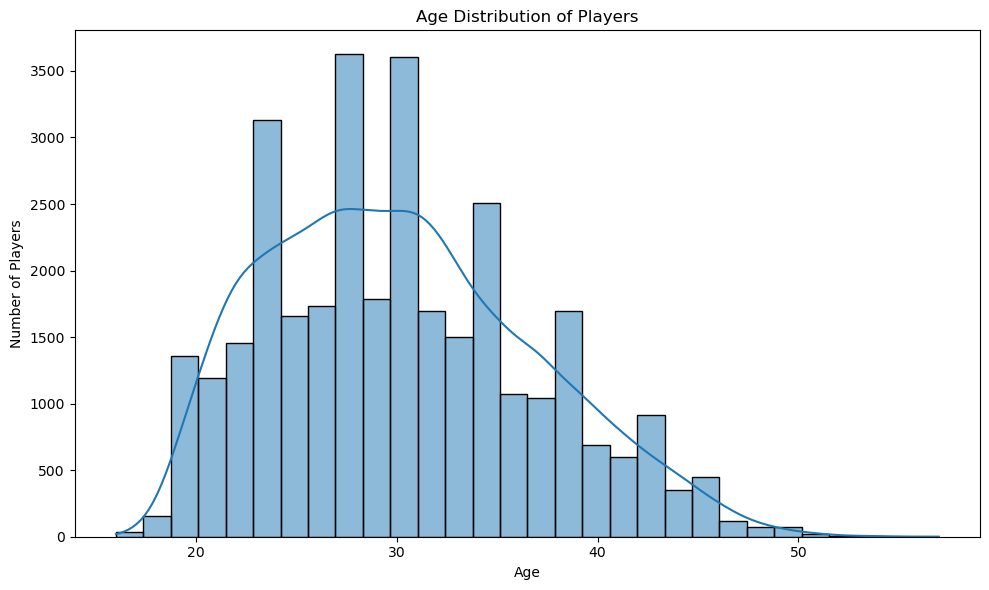

In [10]:
# 3)  Demographic analysis
# a) Age distribution

plt.figure(figsize = (10, 6))
sns.histplot(df_players['age'], bins = 30, kde = True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()

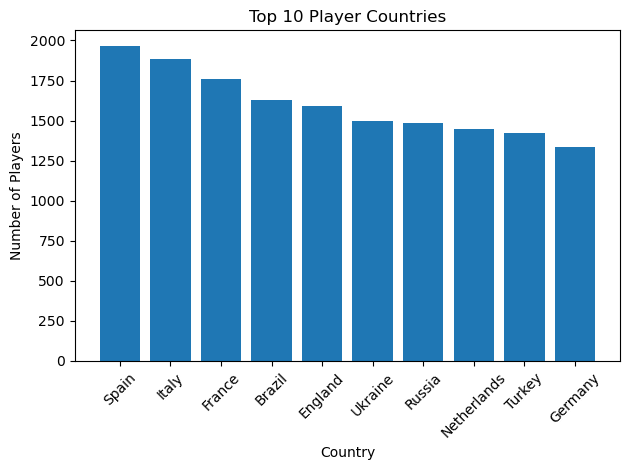

In [11]:
# b) Nationality: Top 10 Most Common Nationalities

top_10_player_countries = df_players['country_of_citizenship'].value_counts().head(10)

plt.bar(top_10_player_countries.index, top_10_player_countries.values)
plt.xticks(rotation = 45)
plt.title('Top 10 Player Countries')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()

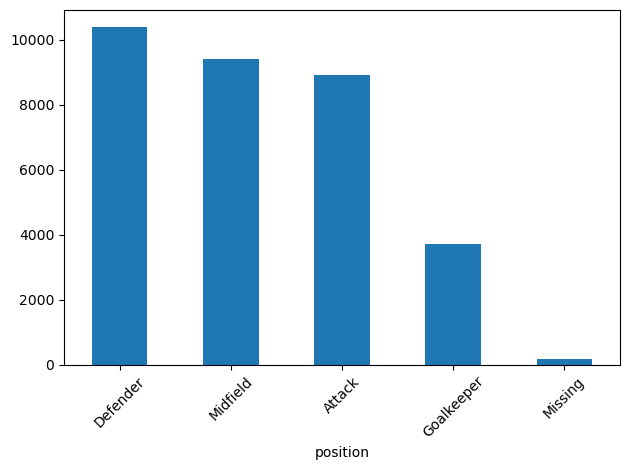

In [12]:
# c) Position Counts
df_players['position'].value_counts().plot.bar()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [13]:
# d) Position by country
df_players.groupby('country_of_citizenship')['position'].value_counts().unstack().fillna(0)

#.sort_values(by = 'position', ascending = False).head(10)

position,Attack,Defender,Goalkeeper,Midfield,Missing
country_of_citizenship,,,,,
Afghanistan,0.0,1.0,0.0,2.0,0.0
Albania,49.0,36.0,12.0,43.0,1.0
Algeria,56.0,45.0,7.0,47.0,0.0
Andorra,0.0,0.0,1.0,0.0,0.0
Angola,37.0,19.0,4.0,18.0,0.0
...,...,...,...,...,...
Venezuela,35.0,23.0,6.0,17.0,0.0
Vietnam,1.0,1.0,0.0,0.0,0.0
Wales,28.0,44.0,16.0,45.0,0.0


In [14]:
# Create pivot table with counts per position
count_df = df_players.groupby('country_of_citizenship')['position'].value_counts().unstack().fillna(0)
# Create a new column 'Total' for total player count per country
count_df['Total'] = count_df.sum(axis=1)
# Sort based on the 'Total' count in descending order and show top 10 countries
sorted_count_df = count_df.sort_values(by='Total', ascending=False).head(10)
sorted_count_df

position,Attack,Defender,Goalkeeper,Midfield,Missing,Total
country_of_citizenship,,,,,,
Spain,518.0,663.0,243.0,535.0,6.0,1965.0
Italy,410.0,613.0,326.0,533.0,5.0,1887.0
France,431.0,604.0,191.0,526.0,9.0,1761.0
Brazil,515.0,555.0,135.0,418.0,6.0,1629.0
England,412.0,575.0,162.0,433.0,6.0,1588.0
Ukraine,346.0,465.0,195.0,469.0,22.0,1497.0
Russia,331.0,461.0,226.0,462.0,2.0,1482.0
Netherlands,342.0,469.0,227.0,401.0,8.0,1447.0
Turkey,353.0,474.0,173.0,420.0,4.0,1424.0


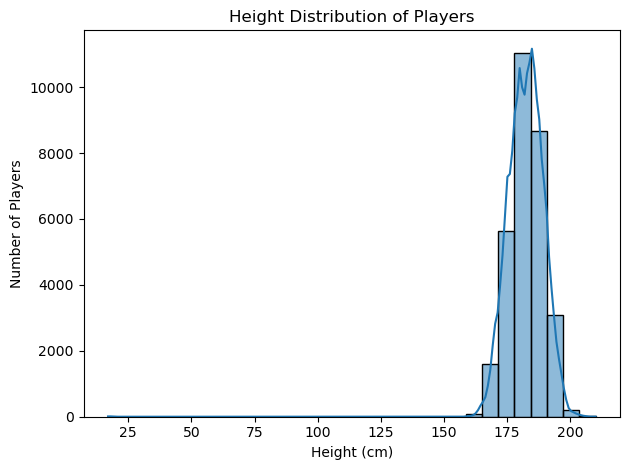

In [15]:
# 4) Physical Attributes
# a) Height Distribution

sns.histplot(df_players['height_in_cm'], bins=30, kde=True)
plt.title('Height Distribution of Players')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()

In [16]:
# 5) Career Information
# a) Number of unique clubs represented in the dataset
df_players['current_club_id'].nunique()

437

In [17]:
# b) Count how many players are free agents (not currently signed to any club)
df_players['current_club_id'].isnull().value_counts()

current_club_id
False    32601
Name: count, dtype: int64

There are literlly no free agents as shown in the above code!!

In [18]:
# Top 10 clubs by player count
club_age_stats = (
    df_players.groupby("current_club_name")["age"]
    .agg(["count", "mean", "median"])
    .sort_values("count", ascending=False)
)

print(club_age_stats.head(10))

                                   count       mean  median
current_club_name                                          
Kilmarnock Football Club             185  31.124324    30.0
Motherwell Football Club             182  29.296703    29.0
Ross County Football Club            180  30.933333    31.0
Dundee Football Club                 178  31.522472    31.0
Çaykur Rizespor Kulübü               166  30.481928    30.0
Saint Johnstone Football Club        165  30.151515    29.0
Genoa Cricket and Football Club      163  29.920245    29.0
Antalyaspor                          163  30.539877    31.0
Atalanta Bergamasca Calcio S.p.a.    158  29.506329    28.0
A.G.S Asteras Tripolis               156  30.724359    30.0


In [19]:
df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'])
df_players['age'] = (pd.Timestamp.today() - df_players['date_of_birth']).dt.days // 365

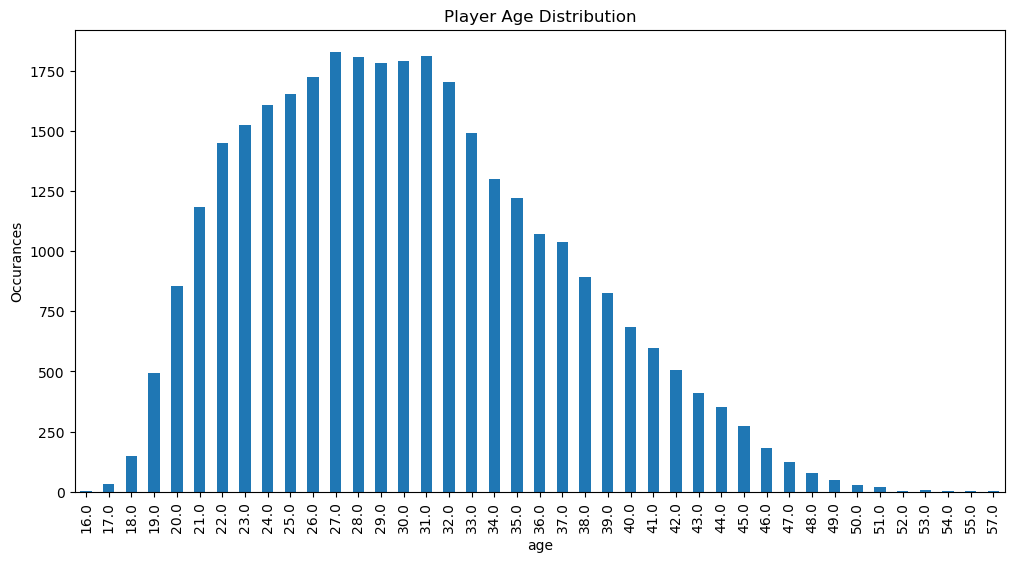

In [20]:
# Age distribution
df_players['age'].value_counts().sort_index().plot(kind='bar', 
       figsize=(12,6), 
       title='Player Age Distribution')
plt.ylabel('Occurances')
plt.show()

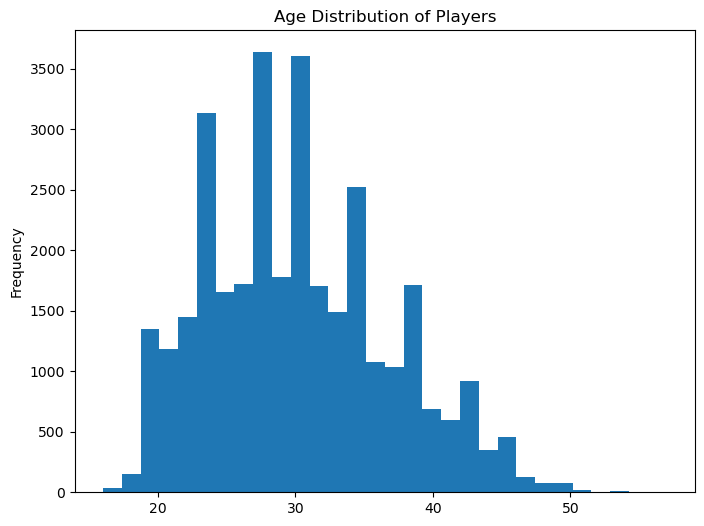

In [21]:
df_players["age"].plot(kind="hist", 
                       bins=30, 
                       figsize=(8,6), 
                       title="Age Distribution of Players")
plt.show()

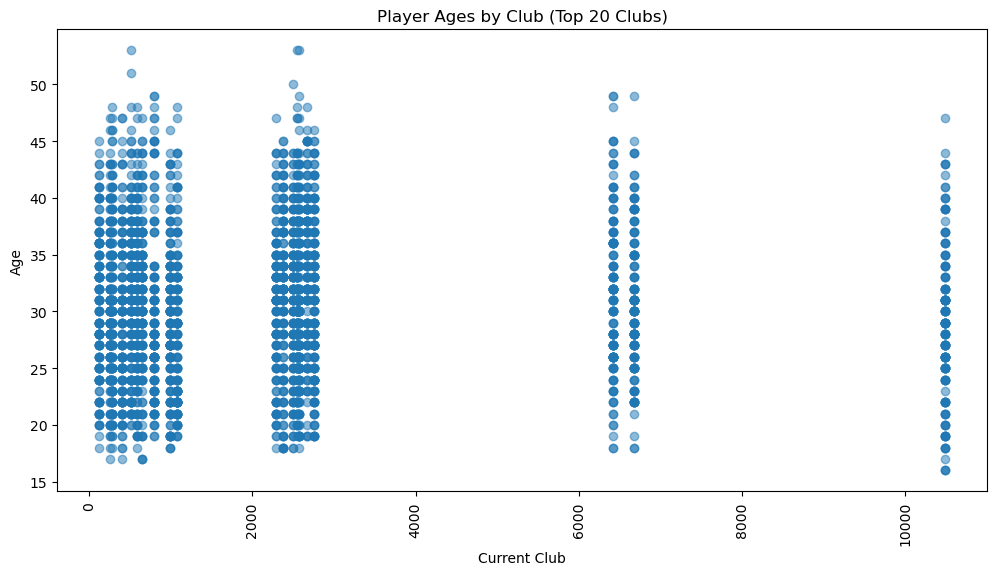

In [22]:
# c) Age Vs Current club
top20_clubs = (
    df_players['current_club_id']
    .value_counts()
    .head(20)
    .index
)

sample = df_players[df_players['current_club_id'].isin(top20_clubs)]

plt.figure(figsize=(12,6))
plt.scatter(sample['current_club_id'], sample['age'], alpha=0.5)
plt.xticks(rotation=90)
plt.title("Player Ages by Club (Top 20 Clubs)")
plt.xlabel("Current Club")
plt.ylabel("Age")
plt.show()

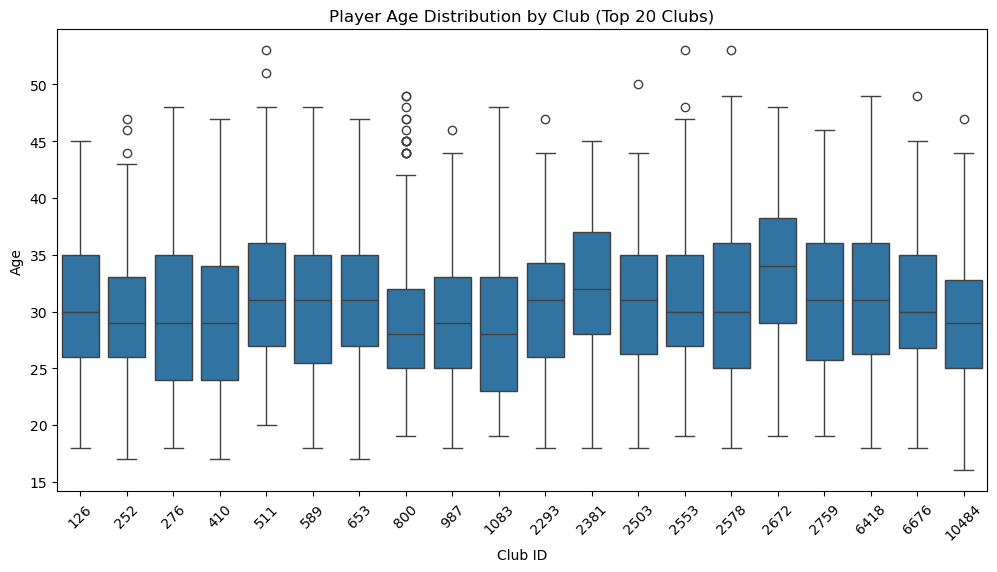

In [23]:
top_clubs = df_players['current_club_id'].value_counts().head(20).index
df_top = df_players[df_players['current_club_id'].isin(top_clubs)]

plt.figure(figsize=(12,6))
sns.boxplot(x="current_club_id", y="age", data=df_top)
plt.title("Player Age Distribution by Club (Top 20 Clubs)")
plt.xlabel("Club ID")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

In [24]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             32601 non-null  int64         
 1   name                                  32601 non-null  object        
 2   last_season                           32601 non-null  int64         
 3   current_club_id                       32601 non-null  int64         
 4   player_code                           32601 non-null  object        
 5   country_of_citizenship                32218 non-null  object        
 6   date_of_birth                         32554 non-null  datetime64[ns]
 7   sub_position                          32421 non-null  object        
 8   position                              32601 non-null  object        
 9   foot                                  30065 non-null  object        
 10

In [25]:
# Assuming season or year reference, e.g., 2021-01-01
reference_date = pd.to_datetime("2021-01-01")  

df_players['age'] = (reference_date - df_players['date_of_birth']).dt.days // 365

In [26]:
df_players['age'].describe()

count    32554.000000
mean        25.408675
std          6.656473
min         11.000000
25%         20.000000
50%         25.000000
75%         30.000000
max         52.000000
Name: age, dtype: float64

In [27]:
df_players = df_players[(df_players['age'] >= 15) & (df_players['age'] <= 40)]

In [28]:
df_players.head().sort_values(by = 'age', ascending = False)

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
1,26,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,Neubauer 13 GmbH,L1,Borussia Dortmund,750000.0,8000000.0,40.0
6,123,Christoph Metzelder,2012,33,christoph-metzelder,Germany,1980-11-05,Centre-Back,Defender,NaN,NaN,NaN,L1,FC Schalke 04,1500000.0,9500000.0,40.0
7,132,Tomas Rosicky,2015,11,tomas-rosicky,Czech Republic,1980-10-04,Attacking Midfield,Midfield,both,179.0,NaN,GB1,Arsenal Football Club,350000.0,17500000.0,40.0
2,65,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,CSKA-AS-23 Ltd.,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,39.0
4,80,Tom Starke,2017,27,tom-starke,Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,IFM,L1,FC Bayern München,100000.0,3000000.0,39.0


In [29]:
df_players['age'] = df_players['age'].astype(int)

df_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31440 entries, 1 to 32600
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             31440 non-null  int64         
 1   name                                  31440 non-null  object        
 2   last_season                           31440 non-null  int64         
 3   current_club_id                       31440 non-null  int64         
 4   player_code                           31440 non-null  object        
 5   country_of_citizenship                31060 non-null  object        
 6   date_of_birth                         31440 non-null  datetime64[ns]
 7   sub_position                          31282 non-null  object        
 8   position                              31440 non-null  object        
 9   foot                                  29119 non-null  object        
 10  hei

In [30]:
df_players.loc[df_players['current_club_name'] == "Paris Saint-Germain Football Club", ["name", "age", "market_value_in_eur"]].sort_values(by = 'market_value_in_eur', ascending = False)

,name,age,market_value_in_eur
23777,Khvicha Kvaratskhelia,19,80000000.0
16531,Ousmane Dembélé,23,75000000.0
28518,Bradley Barcola,18,70000000.0
27809,João Neves,16,65000000.0
21005,Achraf Hakimi,22,65000000.0
30836,Désiré Doué,15,60000000.0
23481,Vitinha,20,60000000.0
26564,Nuno Mendes,18,55000000.0
5941,Neymar,28,50000000.0
27609,Willian Pacho,19,45000000.0
